In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets 
### **appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.**

In [2]:
cust_data = pd.read_csv(r"C:\Users\Kuldeep Ragadwal\Downloads\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")
claims = pd.read_csv(r"C:\Users\Kuldeep Ragadwal\Downloads\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\claims.csv")

In [3]:
cust_data.head(4)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver


In [4]:
claims.head(4)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [5]:
cust_data.dtypes

CUST_ID         int64
gender         object
DateOfBirth    object
State          object
Contact        object
Segment        object
dtype: object

In [6]:
cust_data['DateOfBirth'] = pd.to_datetime(cust_data.DateOfBirth, format='%d-%b-%y') # to make object to datetime

In [7]:
cust_data.dtypes

CUST_ID                 int64
gender                 object
DateOfBirth    datetime64[ns]
State                  object
Contact                object
Segment                object
dtype: object

In [8]:
claims.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [9]:
claims.head(4)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [10]:
claims['claim_date'] = claims.claim_date.str.replace("/", "-", regex=False) # firstlt we make all dates in same format.

In [11]:
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11-27-2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10-03-2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02-02-2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06-17-2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01-13-2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06-11-2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03-14-2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02-09-2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03-21-2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [12]:
claims['claim_date'] = pd.to_datetime(claims.claim_date, format="%m-%d-%Y") #make claim_date to datetime dtype

In [13]:
claims.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
dtype: object

In [14]:
claims['claim_amount'] = claims['claim_amount'].str.replace('$', '') #firstly remove '$' sign so can convert it do numeric.

In [15]:
claims['claim_amount'] = claims['claim_amount'].astype('float') # using astype to convert into float dtype.

In [16]:
claims.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
dtype: object

In [17]:
cust_claim_360 = cust_data.merge(claims, how = 'left', left_on= 'CUST_ID', right_on='customer_id')

In [18]:
cust_claim_360

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No
1088,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No
1089,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No
1090,11256802,Female,2064-10-22,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No


In [19]:
cust_claim_360.drop(columns= 'customer_id', inplace= True)

In [20]:
cust_claim_360.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                      float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
dtype: object

In [21]:
cust_claim_360.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1092 non-null   int64         
 1   gender               1092 non-null   object        
 2   DateOfBirth          1092 non-null   datetime64[ns]
 3   State                1092 non-null   object        
 4   Contact              1092 non-null   object        
 5   Segment              1092 non-null   object        
 6   claim_id             1085 non-null   float64       
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1020 non-null   float64       
 13  total_policy_claims  1075 non-nul

In [22]:
cust_claim_360.nunique()

CUST_ID                1085
gender                    2
DateOfBirth            1085
State                    50
Contact                1085
Segment                   3
claim_id               1085
incident_cause            5
claim_date              100
claim_area                2
police_report             3
claim_type                3
claim_amount            676
total_policy_claims       8
fraudulent                2
dtype: int64

In [23]:
cust_claim_360.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent'],
      dtype='object')

In [24]:
cust_claim_360.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1092 non-null   int64         
 1   gender               1092 non-null   object        
 2   DateOfBirth          1092 non-null   datetime64[ns]
 3   State                1092 non-null   object        
 4   Contact              1092 non-null   object        
 5   Segment              1092 non-null   object        
 6   claim_id             1085 non-null   float64       
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1020 non-null   float64       
 13  total_policy_claims  1075 non-nul

 ## **Note: Question 2 and Question 3 has been done before merging the dataset. Please read above code for your reference of Q2 and Q3.**

### **Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.**

In [25]:
cust_claim_360['alert_flag'] = np.where(cust_claim_360['police_report'] == 'Yes', 1,
                                        np.where(cust_claim_360['police_report'] == 'No', 0, 2)) #where 2 is for unreported

In [26]:
cust_claim_360

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,2
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796.0,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,1
1088,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067.0,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0
1089,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1
1090,11256802,Female,2064-10-22,LA,469-345-5617,Silver,12376894.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0


In [27]:
cust_claim_360 = cust_claim_360.sort_values(['CUST_ID', 'claim_date'], ascending=[True, False])#sort data based on cust_id and claim_date


cust_claim_360 = cust_claim_360.drop_duplicates('CUST_ID', keep='first') # Drop duplicates based on 'CUST_ID' while keeping the most recent observation

In [28]:
cust_claim_360.shape

(1085, 16)

### **Check for missing values and impute the missing values with an appropriate value.** 
### **(mean for continuous and mode for categorical)**

In [29]:
cust_claim_360.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
alert_flag              0
dtype: int64

In [30]:
categorical_vars = ['gender','State', 'Contact', 'Segment', 'incident_cause','claim_area','police_report', 'claim_type','fraudulent']

In [31]:
categorical_vars

['gender',
 'State',
 'Contact',
 'Segment',
 'incident_cause',
 'claim_area',
 'police_report',
 'claim_type',
 'fraudulent']

In [32]:
def fill_categorical_nulls(df, categorical_vars): #making UDF
    for var in categorical_vars:
        mode_val = df[var].dropna().mode().iloc[0]
        df[var] = df[var].fillna(mode_val)
        
fill_categorical_nulls(cust_claim_360, categorical_vars)  #applying UDF


In [33]:
continuous_vars = ['claim_id', 'claim_amount', 'total_policy_claims']

In [34]:
def fill_continuous_nulls(df, continuous_vars):
    for var in continuous_vars:
        mean_val = df[var].dropna().mean()
        df[var] = df[var].fillna(mean_val)
        
fill_continuous_nulls(cust_claim_360, continuous_vars)


In [40]:
mode_value = cust_claim_360.claim_date.mode()[0]
cust_claim_360['claim_date'] = cust_claim_360.claim_date.fillna(mode_value)

### **7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria:**
### **Children < 18**  
### **Youth 18-30**
### **Adult 30-60**
### **Senior > 60**

In [49]:
from datetime import datetime

cust_claim_360['Age'] = (pd.to_datetime(datetime.today()) - pd.to_datetime(cust_claim_360['DateOfBirth'])) / pd.Timedelta(days=365.2425)

In [50]:
cust_claim_360.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,Age
188,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12501.726555,1.0,Yes,0,45.982105
843,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0,51.403161


In [51]:
cust_claim_360['Cust_cat'] = np.select([cust_claim_360.Age < 18,
     (cust_claim_360.Age >= 18) & (cust_claim_360.Age < 30),
     (cust_claim_360.Age >= 30) & (cust_claim_360.Age < 60)],
    ['Children', 'Youth', 'Adult'],
    default='Senior'
)

In [52]:
cust_claim_360.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,Age,Cust_cat
188,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12501.726555,1.0,Yes,0,45.982105,Adult
843,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0,51.403161,Adult


### **What is the average amount claimed by the customers from various segments?**

In [57]:
cust_claim_360.groupby('Segment')['claim_amount'].sum().astype(np.float32)

Segment
Gold        4778516.0
Platinum    4503672.5
Silver      4282184.5
Name: claim_amount, dtype: float32

### **What is the total claim amount based on incident cause for all the claims that have been done** 
### **at least 20 days prior to 1st of October, 2018.**

In [62]:
cust_claim_360[
    cust_claim_360.claim_date < (
        datetime(2018, 10, 1) - pd.Timedelta(days=20)
    )
].groupby('incident_cause')[
    'claim_amount'
].sum().astype(np.float32)

incident_cause
Crime                  721938.625
Driver error          3315850.750
Natural causes        1312987.000
Other causes          3810664.000
Other driver error    3277536.500
Name: claim_amount, dtype: float32

### **How many adults from TX, DE and AK claimed insurance for driver related issues and causes?**

In [67]:
cust_claim_360.loc[(cust_claim_360['Cust_cat'] == 'Adult') & 
                   (cust_claim_360['Segment'].isin(['TX', 'DE', 'AK'])) &
                   (cust_claim_360['incident_cause'].isin(['Driver error', 'Other driver error']))
                  ].shape[0]

0

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [82]:
summ1 = cust_claim_360.groupby(['gender','Segment'])['claim_amount'].sum().reset_index()


In [83]:
summ2 = summ1.pivot(columns='gender', index = 'Segment',values = 'claim_amount')

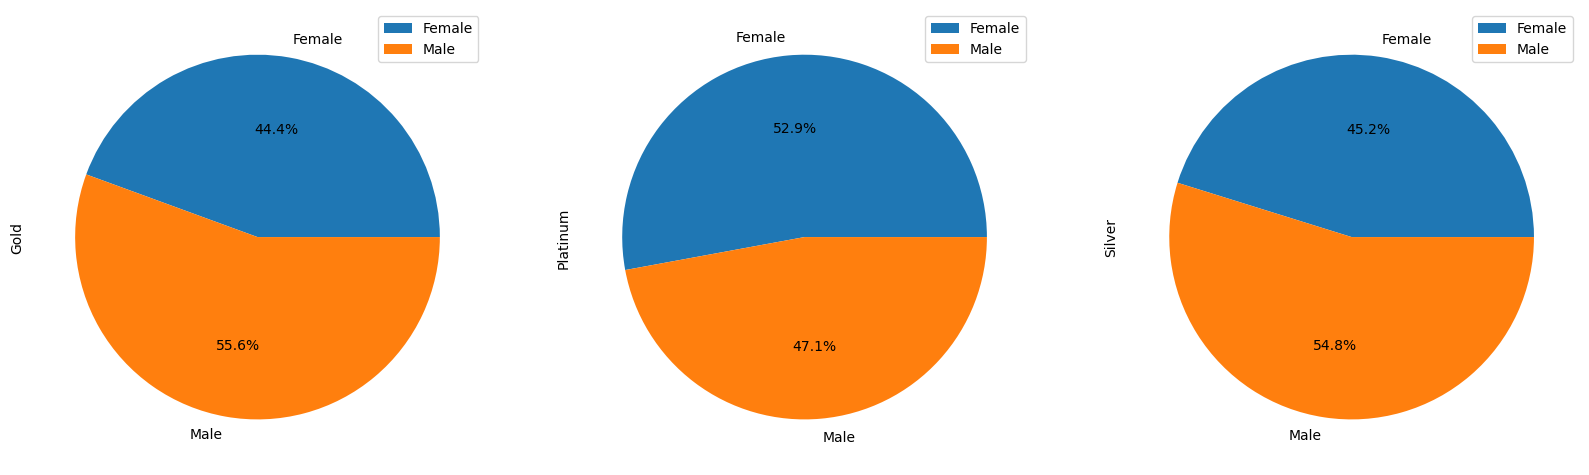

In [85]:
summ2.T.plot(kind="pie", subplots= True, legend= True,figsize=(20,10), autopct='%1.1f%%')
plt.show()

### **12. Among males and females, which gender had claimed the most for any type of driver related issues?** 
### **E.g. This metric can be compared using a bar chart**

In [94]:
gender_count = cust_claim_360.loc[cust_claim_360['incident_cause'].isin(['Driver error', 'Other driver error'])].groupby('gender')['claim_amount'].count().reset_index()

In [96]:
gender_count.rename({'claim_amount': 'Count_of_gender'}, axis = 1, inplace= True)

<Axes: xlabel='Gender', ylabel='Count'>

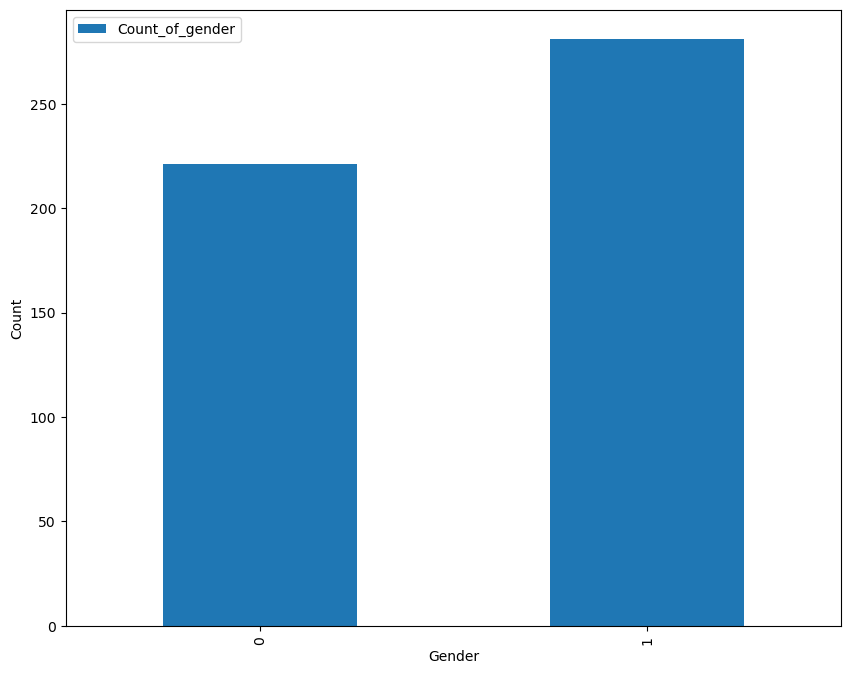

In [102]:
gender_count.plot(kind='bar', figsize = (10,8), xlabel = 'Gender', ylabel = 'Count')


### **Male gender had claimed the most for any type of driver related issues.**

### **Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.**

In [114]:
summ3 =cust_claim_360.groupby('Cust_cat')['fraudulent'].count()

In [115]:
summ3

Cust_cat
Adult       669
Children    246
Youth       170
Name: fraudulent, dtype: int64

<Axes: xlabel='Cust_age_group', ylabel='Count_of Fraudulant'>

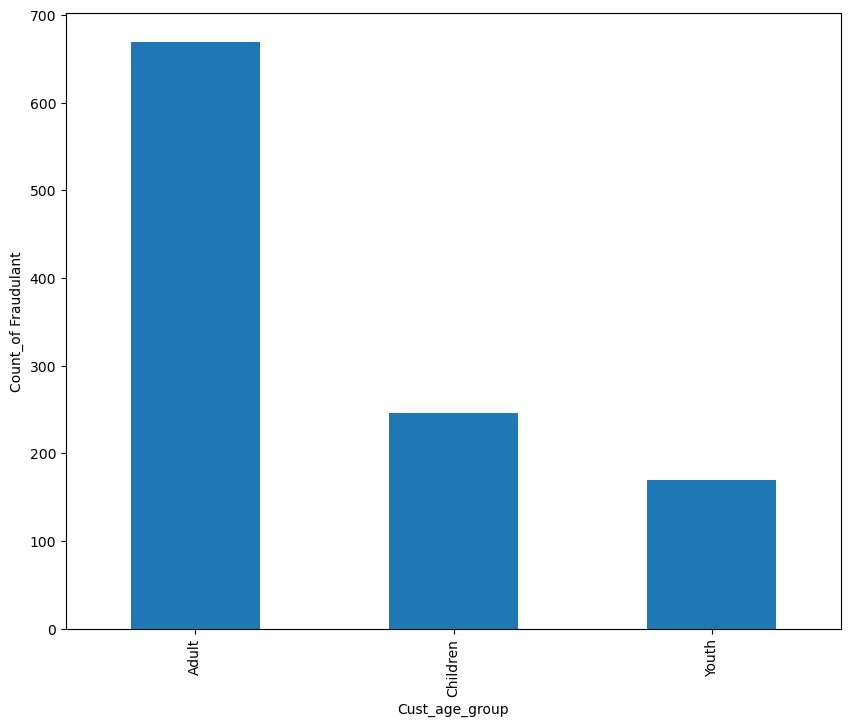

In [116]:
summ3.plot(kind='bar', figsize = (10,8), xlabel = 'Cust_age_group', ylabel = 'Count_of Fraudulant')

### **Adult age group had the maximum fraudulent policy claims.**

### **Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the ### **“month” axis, the month is in a chronological order not alphabetical order.**  

In [117]:
cust_claim_360['Month'] = cust_claim_360['claim_date'].dt.month

In [133]:
summ4 = cust_claim_360.groupby('Month')['claim_amount'].sum()

In [134]:
summ4

Month
1     1.327171e+06
2     1.164542e+06
3     1.320250e+06
4     1.380026e+06
5     1.114461e+06
6     1.279030e+06
7     1.379316e+06
8     9.112972e+05
9     9.832003e+05
10    1.409639e+06
11    6.011875e+05
12    6.942527e+05
Name: claim_amount, dtype: float64

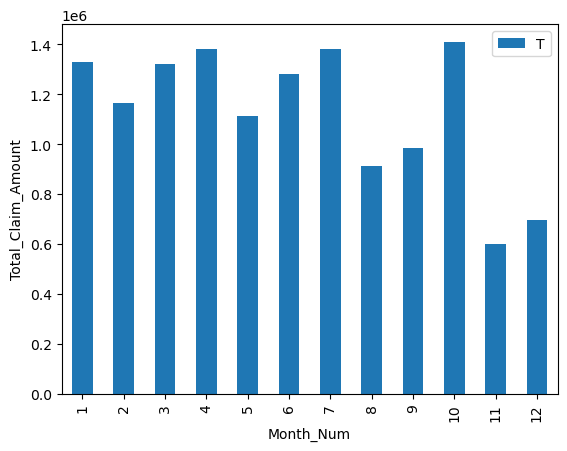

In [135]:
summ4.plot(kind = 'bar', xlabel = 'Month_Num', ylabel = 'Total_Claim_Amount')
plt.legend('Total Claim Amount')

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [141]:
cust_claim_360.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'alert_flag', 'Age', 'Cust_cat', 'Month'],
      dtype='object')

In [142]:
df =pd.pivot_table(data=cust_claim_360,index=["Cust_cat","gender"],columns=['fraudulent'],
                                       values='claim_amount',aggfunc='mean')

In [143]:
df

fraudulent                 No           Yes
Cust_cat gender                            
Adult    Female  12189.749062  13572.619087
         Male    12449.840849  15186.621720
Children Female  12309.969276   6440.328571
         Male    11601.393605  16923.860000
Youth    Female  13304.366268  10144.590819
         Male    12894.588324   9345.480468

array([<Axes: title={'center': 'No'}, xlabel='Cust_cat,gender'>,
       <Axes: title={'center': 'Yes'}, xlabel='Cust_cat,gender'>],
      dtype=object)

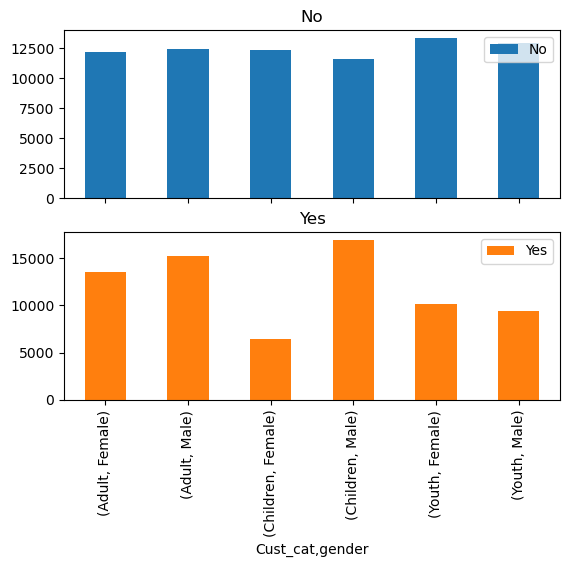

In [144]:
df.plot(kind='bar', subplots = True)

### 16. Is there any similarity in the amount claimed by males and females?

In [153]:
import scipy.stats as stats

In [154]:
male_df = cust_claim_360.loc[cust_claim_360.gender == 'Male', 'claim_amount']

female_df = cust_claim_360.loc[cust_claim_360.gender == 'Female', 'claim_amount']

### **Hypothesis Testing:**

### **Null Hypothesis (H0): The average claimed amount by males equals the average claimed amount by females.**
### **Alternative Hypothesis (H1): The average claimed amount by males differs from the average claimed amount by females.**
### **Significance Level: Set at 0.05.**
### **Test Type: A t-test will be conducted.**

In [155]:

stats.ttest_ind(male_df, female_df)

TtestResult(statistic=0.9624541122991915, pvalue=0.3360363827572097, df=1083.0)

### **Conclusion:**
### **Since the p-value exceeds 0.05, we do not have sufficient evidence to reject the null hypothesis.**
### **This suggests that there is no significant difference in the claimed amounts between males and females.**

In [160]:
cust_claim_360['Year'] = pd.DatetimeIndex(cust_claim_360.claim_date).year
current_year = cust_claim_360.loc[cust_claim_360.Year == 2018]["claim_amount"] # as the data is available for 2017 and 2018

### Hypothesis Testing:

- **Null Hypothesis (H0):** The average claim amount in the current year equals $10,000.
  
- **Alternative Hypothesis (H1):** The average claim amount in the current year differs from $10,000.
  
- **Significance Level:** Set at 0.05.
  
- **Test Type:** A t-test will be conducted.


In [161]:
stats.ttest_1samp(current_year, popmean=10000)

TtestResult(statistic=4.536327831966947, pvalue=7.204040324324159e-06, df=491)

### Conclusion:

- Since the p-value is below 0.05, we reject the null hypothesis.
  
- The average claim amount in the current year differs from $10,000.


### 19. Is there any difference between age groups and insurance claims?

**Hypothesis Testing:**

- **Null Hypothesis (H0):** There is no variation in insurance claims among different age groups.
  
- **Alternative Hypothesis (H1):** There is a variation in insurance claims among different age groups.
  
- **Significance Level:** Set at 0.05.
  
- **Test Type:** An F-Test will be conducted.


In [157]:
youth_df =cust_claim_360.loc[cust_claim_360['Cust_cat']=="Youth",'total_policy_claims']
adult_df = cust_claim_360.loc[cust_claim_360['Cust_cat']=="Adult",'total_policy_claims']
stats.f_oneway(youth_df, adult_df)

F_onewayResult(statistic=0.23029169312878545, pvalue=0.6314330031278861)

### Conclusion:

- As the p-value is greater than 0.05, we fail to reject the null hypothesis.
  
- There is no difference in insurance claims across different age groups.
